In [39]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [94]:
#importing dataset
train = pd.read_excel(r'C:/Users/30016142/Model_File_Unit-7_June_2019.xlsx')

In [95]:
train.head(3)

,Date,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,RH Dmaper Position>70,Sootblowing status,Excess Air,...,ASH,VM,FC,GCV,C %,H %,Majority Coal,Majority Coal%,MS Temp>565,MS Temp L-R diff
0,2019-06-25 12:00:00,0.000000,1,1,1,10.777100,13.366008,1,0,18.267974,...,5.52,28.82,32.36,4169.0,46.2585,2.299716,GAR,60,0,0.882525
1,2019-06-25 14:00:00,10.224247,1,1,0,4.405464,6.632478,1,0,16.386494,...,5.52,28.82,32.36,4169.0,46.2585,2.299716,GAR,60,0,0.305493
2,2019-06-25 16:00:00,8.112285,1,1,0,6.107914,13.708455,1,0,17.401112,...,5.52,28.82,32.36,4169.0,46.2585,2.299716,GAR,60,0,9.394179


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2695 non-null   datetime64[ns]
 1   Load_Variation_in_last_2H  2693 non-null   float64       
 2   Both Top Mill Running      2695 non-null   int64         
 3   Both Bottam Mill Running   2695 non-null   int64         
 4   Mill Outlet temp>60 Deg    2695 non-null   int64         
 5   SH_Spray-Stage1            2695 non-null   float64       
 6   SH_Spray-Stage2            2695 non-null   float64       
 7   RH Dmaper Position>70      2695 non-null   int64         
 8   Sootblowing status         2695 non-null   int64         
 9   Excess Air                 2695 non-null   float64       
 10  Excess Air>25              2695 non-null   int64         
 11  LTRH Outlet FG L-R gap     2695 non-null   float64       
 12  Eco Ou

In [98]:
#converting Load variation % into numbers and dropping date feature
train = train.drop('Date', axis = 1)

<AxesSubplot:xlabel='MS Temp>565', ylabel='count'>

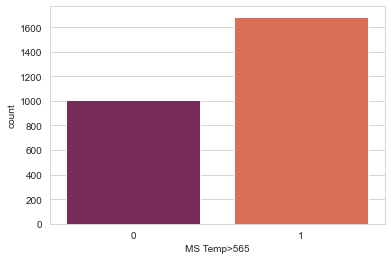

In [99]:
#understanding the class distribution
sns.set_style('whitegrid')
sns.countplot(x='MS Temp>565',data=train,palette='rocket')

In [100]:
#Profilling report

from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file("June_2019.html")

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
#getting dummy values for coal type
train = pd.get_dummies(train)

In [120]:
train

,Load_Variation_in_last_2H,Both Top Mill Running,Both Bottam Mill Running,Mill Outlet temp>60 Deg,SH_Spray-Stage1,SH_Spray-Stage2,RH Dmaper Position>70,Sootblowing status,Excess Air,Excess Air>25,...,VM,FC,GCV,C %,H %,Majority Coal%,MS Temp>565,MS Temp L-R diff,Majority Coal_GAR,Majority Coal_MEL
0,0.000000,1,1,1,10.777100,13.366008,1,0,18.267974,0,...,28.82,32.36,4169.0,46.258500,2.299716,60,0,0.882525,1,0
1,10.224247,1,1,0,4.405464,6.632478,1,0,16.386494,0,...,28.82,32.36,4169.0,46.258500,2.299716,60,0,0.305493,1,0
2,8.112285,1,1,0,6.107914,13.708455,1,0,17.401112,0,...,28.82,32.36,4169.0,46.258500,2.299716,60,0,9.394179,1,0
3,3.645657,1,1,0,15.740980,17.774427,0,1,17.158762,0,...,28.82,32.36,4169.0,46.258500,2.299716,60,1,5.178158,1,0
4,7.448928,1,1,1,14.092148,16.454960,0,1,17.241492,0,...,28.82,32.36,4169.0,46.258500,2.299716,60,0,7.406966,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,46.626288,0,0,1,31.898224,7.736029,1,1,18.916429,0,...,32.45,31.13,4286.0,47.441969,2.585298,80,0,15.582838,1,0
2691,59.078289,0,0,1,18.343778,7.135397,1,0,37.509548,1,...,32.45,31.13,4286.0,47.441969,2.585298,80,0,12.031875,1,0
2692,1.119608,0,0,1,18.155462,9.638056,1,0,36.202967,1,...,32.45,31.13,4286.0,47.441969,2.585298,80,1,2.736449,1,0
2693,18.208944,0,0,1,28.295098,13.493320,1,1,32.343019,1,...,32.45,31.13,4286.0,47.441969,2.585298,80,1,4.557475,1,0


In [121]:
train.fillna(0, inplace=True)

In [122]:
# Spliting data for training the model. for Train test purpose
from sklearn.model_selection import train_test_split as tts
X = train.drop('MS Temp>565', axis = 1)
y = train['MS Temp>565']
X_train, X_test, Y_train, Y_test = tts(X, y, test_size=0.40,random_state=42)

In [123]:
#Modelling

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predtrain = dt.predict(X_train)
y_pred= dt.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print("total Observation",len(X_test))
print("Accuracy on Train data:",accuracy_score(Y_train,Y_predtrain))
print("Accuracy on Test data:",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred))


total Observation 1078
Accuracy on Train data: 1.0
Accuracy on Test data: 0.800556586270872
Confusion Matrix: [[306  96]
 [119 557]]


In [108]:
#Finding the most important features
dt.feature_importances_

array([0.08140452, 0.00351442, 0.0057963 , 0.00475765, 0.02953991,
       0.120712  , 0.00237224, 0.00896271, 0.03688512, 0.00175721,
       0.0473967 , 0.07502778, 0.02582777, 0.0310617 , 0.00248335,
       0.01867265, 0.01999352, 0.00944222, 0.01776409, 0.00897197,
       0.44589895, 0.        , 0.00175721])

Text(0.5, 0, 'Decision Tree Feature Importance')

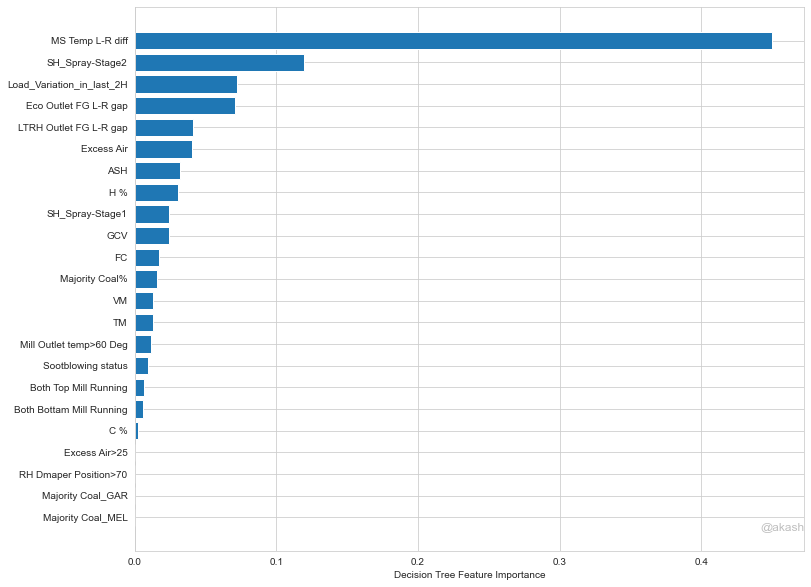

In [118]:
#visulizing feature importance

fig, ax = plt.subplots(figsize=(12,10))
fig.text(0.9, 0.15, '@akash', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [124]:
ip = list(zip(dt.feature_importances_,X_train.columns.values))
op = pd.DataFrame(ip,columns=["Importance_2019","Feature_Name_2019"])

In [125]:
op.to_excel("feature_2019.xlsx")